In [1]:
#SVM支持向量机的核函数
#将二维数据变成三维数据的过程,称为将数据投射到高维空间.,这正是SVM算法的核函数(kernel trick)功能.在SVM中用的最普遍的两种把数据投射到高维空间的方法分别是多项式内核(Polynomial kernel)和径向基内核(Radial basis function kernel,RBF).
#在SVM算法中,训练模型的过程实际上是对每个数据点对于数据分裂决定边界的重要性进行判断.在训练数据集中,只有一部分数据对于边界的确定是有帮助的,而这些数据点就是正好位于决定边界上的,这些数据被称为"支持向量"(support vectors).
#核函数为linear的SVM支持向量机
#############################  支持向量机的核函数 #######################################
#导入numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt
#导入支持向量机svm
from sklearn import svm
#导入数据集生成工具
from sklearn.datasets import make_blobs
 
#先创建50个数据点,让他们分为两类
X,y = make_blobs(n_samples=50,centers=2,random_state=6)
#创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel = 'linear',C=1000)
clf.fit(X,y)
#把数据点画出来
plt.scatter(X[:, 0],X[:, 1],c=y,s=30,cmap=plt.cm.Paired)
 
#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#生成两个等差数列
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
 
#把分类的决定边界画出来
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100,linewidth=1,facecolors='none')
plt.show()

<Figure size 640x480 with 1 Axes>

C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


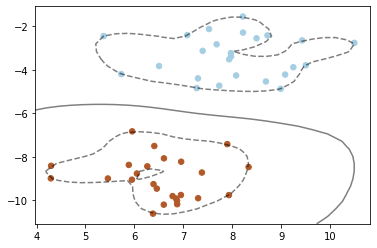

In [2]:
#把SVM的内核换成是RBF
#创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf',C=1000)
clf_rbf.fit(X,y)
 
#把数据点画出来
plt.scatter(X[:, 0],X[:, 1],c=y,s=30,cmap=plt.cm.Paired)
 
#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#生成两个等差数列
xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)
 
#把分类的决定边界画出来
ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
ax.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100,linewidth=1,facecolors='none')
plt.show()


C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


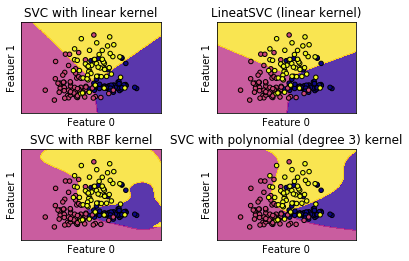

In [3]:
#SVM的核函数与参数选择
#导入红酒数据集
from sklearn.datasets import load_wine
#导入支持向量机svm
from sklearn import svm
#定义一个函数用来画图
def make_meshgrid(x,y,h=.02):
    x_min,x_max = x.min() - 1,x.max() + 1
    y_min,y_max = y.min() - 1,y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy
#定义一个绘制等高线的函数
def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out
 
#使用酒的数据集
wine = load_wine()
#选取数据集的前两个特征
X = wine.data[:, :2]
y = wine.target
 
C = 1.0 #svm的正则化参数
models = (svm.SVC(kernel='linear',C=C),svm.LinearSVC(C=C),svm.SVC(kernel='rbf',gamma=0.7,C=C),svm.SVC(kernel='poly',degree=3,C=C))
models = (clf.fit(X,y) for clf in models)
 
#设定图题
titles = ('SVC with linear kernel','LineatSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel')
 
#设定一个子图形的个数和排列方式
flg, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#使用前面定义的函数进行画图
X0,X1, = X[:, 0],X[:, 1]
xx,yy = make_meshgrid(X0,X1)
 
for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Featuer 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图型显示出来
plt.show()

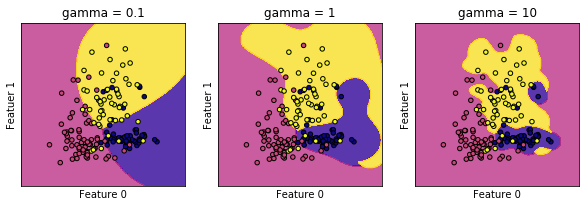

In [4]:
#SVM支持向量机的gamma参数调节
C = 1.0 #svm的正则化参数
models = (svm.SVC(kernel='rbf',gamma=0.1,C=C),svm.SVC(kernel='rbf',gamma=1,C=C),svm.SVC(kernel='rbf',gamma=10,C=C))
models = (clf.fit(X,y) for clf in models)
 
#设定图题
titles = ('gamma = 0.1','gamma = 1','gamma = 10',)
 
#设定一个子图形的个数和排列方式
flg, sub = plt.subplots(1,3,figsize = (10,3))
#使用定义好的函数进行画图
X0,X1, = X[:, 0],X[:, 1]
xx,yy = make_meshgrid(X0,X1)
 
for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Featuer 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图型显示出来
plt.show()

In [ ]:
#SVM支持向量机算法中,有3个参数是比较重要的:
#第一个是核函数的选择;第二个是核函数的参数;第三个是正则化参数C